In [35]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
from scipy.spatial.distance import mahalanobis
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk

nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\adhav\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\adhav\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [72]:
def preprocess_text(text):
    stop_words = set(stopwords.words("english"))
    words = word_tokenize(text.lower())
    filtered_words = [word for word in words if word.isalnum() and word not in stop_words]
    return " ".join(filtered_words)

In [74]:
text1 = r"C:\Projects\text2.txt"
text2 = r"C:\Projects\text3.txt"

try:
    with open(text1, 'r', encoding='utf-8') as file1, open(text2, 'r', encoding='utf-8') as file2:
        text1_content = file1.read()
        text2_content = file2.read()
except FileNotFoundError as e:
    print(f"Error: {e}")
    exit()
    
text1_processed = preprocess_text(text1_content)
text2_processed = preprocess_text(text2_content)

In [76]:
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform([text1_processed, text2_processed])

In [78]:
cosine_sim = cosine_similarity(tfidf_matrix[0], tfidf_matrix[1])
print(f"Cosine Similarity between Text1 and Text2: {cosine_sim[0][0]:.2f}")

Cosine Similarity between Text1 and Text2: 0.40


In [80]:
np.random.seed(42)
data_class1 = np.random.multivariate_normal([2, 2], [[1, 0.5], [0.5, 1]], size=50)
data_class2 = np.random.multivariate_normal([5, 5], [[1, 0.5], [0.5, 1]], size=50)

data = np.vstack([data_class1, data_class2])
labels = np.array([0]*50 + [1]*50)

In [82]:
mean_class1 = np.mean(data_class1, axis=0)
mean_class2 = np.mean(data_class2, axis=0)
cov_matrix = np.cov(data.T)
inv_cov_matrix = np.linalg.inv(cov_matrix)

In [84]:
mahal_distances = []
for point in data:
    dist_class1 = mahalanobis(point, mean_class1, inv_cov_matrix)
    dist_class2 = mahalanobis(point, mean_class2, inv_cov_matrix)
    mahal_distances.append((dist_class1, dist_class2))

In [86]:
classified_labels = [0 if d1 < d2 else 1 for d1, d2 in mahal_distances]

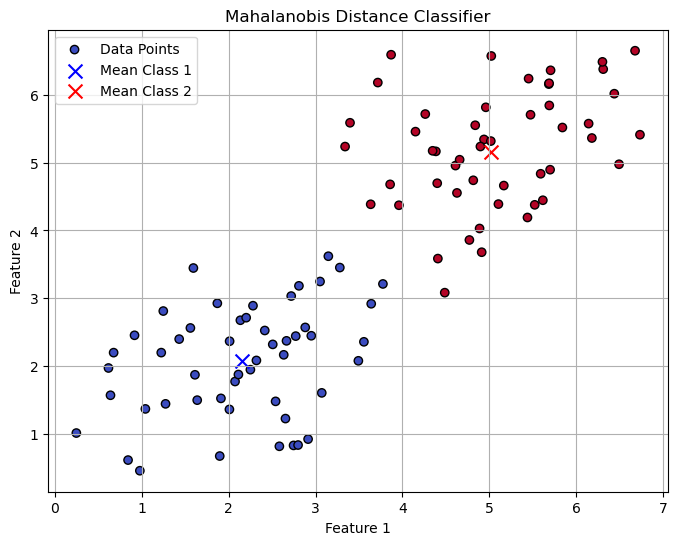

In [88]:
plt.figure(figsize=(8, 6))
plt.scatter(data[:, 0], data[:, 1], c=classified_labels, cmap='coolwarm', edgecolor='k', label="Data Points")
plt.scatter(mean_class1[0], mean_class1[1], color='blue', marker='x', s=100, label="Mean Class 1")
plt.scatter(mean_class2[0], mean_class2[1], color='red', marker='x', s=100, label="Mean Class 2")
plt.title("Mahalanobis Distance Classifier")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()